<a href="https://colab.research.google.com/github/AhmedOsman00py/deep-constrative-learning/blob/main/DeepConstrativeLearning_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

# define the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# define data augmentation generator
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)

# load the MNIST dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape and normalize the input data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) / 255.0

# convert the labels to one-hot encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# train the model with data augmentation
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32), 
                              steps_per_epoch=len(x_train)/32, epochs=10, validation_data=(x_test, y_test))

11490434/11490434 [==============================] - 2s 0us/step


<ipython-input-3-a864417cf6ae>:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),


Epoch 1/10
1875/1875 [==============================] - 39s 15ms/step - loss: 0.2175 - accuracy: 0.9320 - val_loss: 0.0322 - val_accuracy: 0.9884
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0723 - accuracy: 0.9774 - val_loss: 0.0371 - val_accuracy: 0.9879
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0549 - accuracy: 0.9825 - val_loss: 0.0219 - val_accuracy: 0.9927
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0461 - accuracy: 0.9854 - val_loss: 0.0229 - val_accuracy: 0.9924
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0397 - accuracy: 0.9878 - val_loss: 0.0263 - val_accuracy: 0.9917
Epoch 6/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0382 - accuracy: 0.9884 - val_loss: 0.0245 - val_accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0349 - accuracy: 0.9887 - val_loss: 0.0226 -

In [ ]:
# load the test data
_, (test_images, test_labels) = mnist.load_data()

# preprocess the test data
test_images = test_images.reshape((-1, 28, 28, 1))
test_images = test_images.astype('float32') / 255.0
test_labels = to_categorical(test_labels)

# evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0382 - accuracy: 0.9881
Test loss: 0.038206495344638824
Test accuracy: 0.988099992275238


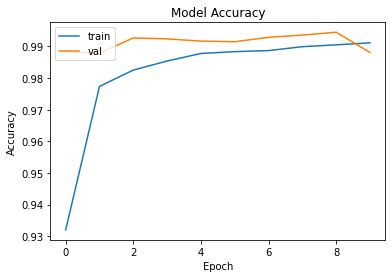

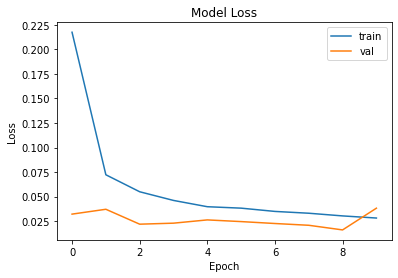

In [ ]:
import matplotlib.pyplot as plt

# plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()